In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time

In [64]:
input_file = 'DIS.csv'
np.random.seed(5)

In [65]:
def create_dataset(dataset, look_back=1):
    dx, dy = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dx.append(a)
        dy.append(dataset[i+look_back, 0])
    return np.array(dx), np.array(dy)

In [66]:
df = read_csv(input_file, header=None, index_col=None, delimiter=',')

In [67]:
all_y = df[5].values
dataset = all_y.reshape(-1, 1)
dataset

array([[ 17.804647],
       [ 17.198397],
       [ 17.677013],
       ...,
       [102.703629],
       [102.959648],
       [102.624855]])

In [68]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_scala = scaler.fit_transform(dataset)

In [69]:
train_size = int(len(dataset_scala) * 1/2)
test_size = len(dataset_scala) - train_size
train, test = dataset_scala[:train_size, :], dataset_scala[train_size:, :]

In [70]:
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
tnx = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
ttx = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [73]:
trainX.shape
tnx.shape
trainY.shape
testX.shape
ttx.shape

(2276, 240)

(2276, 1, 240)

(2276,)

(2277, 240)

(2277, 1, 240)

In [74]:
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(tnx, trainY, epochs=1000, batch_size=240, verbose=1)


Epoch 1/1000
2276/2276 [==============================] - 1s 397us/step - loss: 0.0060
Epoch 2/1000
2276/2276 [==============================] - 0s 14us/step - loss: 0.0020
Epoch 3/1000
2276/2276 [==============================] - 0s 14us/step - loss: 0.0013
Epoch 4/1000
2276/2276 [==============================] - 0s 14us/step - loss: 9.2959e-04
Epoch 5/1000
2276/2276 [==============================] - 0s 15us/step - loss: 6.7547e-04
Epoch 6/1000
2276/2276 [==============================] - 0s 15us/step - loss: 5.3413e-04
Epoch 7/1000
2276/2276 [==============================] - 0s 15us/step - loss: 4.3782e-04
Epoch 8/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.8062e-04
Epoch 9/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.4872e-04
Epoch 10/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.2537e-04
Epoch 11/1000
2276/2276 [==============================] - 0s 16us/step - loss: 3.0571e-04
Epoch 12/1000
2276/

2276/2276 [==============================] - 0s 15us/step - loss: 9.9899e-05
Epoch 92/1000
2276/2276 [==============================] - 0s 14us/step - loss: 1.0573e-04
Epoch 93/1000
2276/2276 [==============================] - 0s 14us/step - loss: 9.6376e-05
Epoch 94/1000
2276/2276 [==============================] - 0s 14us/step - loss: 9.9903e-05
Epoch 95/1000
2276/2276 [==============================] - 0s 14us/step - loss: 9.4810e-05
Epoch 96/1000
2276/2276 [==============================] - 0s 14us/step - loss: 9.4121e-05
Epoch 97/1000
2276/2276 [==============================] - 0s 14us/step - loss: 9.6602e-05
Epoch 98/1000
2276/2276 [==============================] - 0s 13us/step - loss: 9.6669e-05
Epoch 99/1000
2276/2276 [==============================] - 0s 13us/step - loss: 9.2882e-05
Epoch 100/1000
2276/2276 [==============================] - 0s 13us/step - loss: 8.7708e-05
Epoch 101/1000
2276/2276 [==============================] - 0s 14us/step - loss: 9.3460e-05
Epoch 102/1

2276/2276 [==============================] - 0s 15us/step - loss: 6.0851e-05
Epoch 181/1000
2276/2276 [==============================] - 0s 14us/step - loss: 6.1642e-05
Epoch 182/1000
2276/2276 [==============================] - 0s 14us/step - loss: 6.0442e-05
Epoch 183/1000
2276/2276 [==============================] - 0s 14us/step - loss: 5.9954e-05
Epoch 184/1000
2276/2276 [==============================] - 0s 15us/step - loss: 6.5080e-05
Epoch 185/1000
2276/2276 [==============================] - 0s 15us/step - loss: 6.7832e-05
Epoch 186/1000
2276/2276 [==============================] - 0s 15us/step - loss: 6.5166e-05
Epoch 187/1000
2276/2276 [==============================] - 0s 15us/step - loss: 6.5026e-05
Epoch 188/1000
2276/2276 [==============================] - 0s 15us/step - loss: 6.1074e-05
Epoch 189/1000
2276/2276 [==============================] - 0s 15us/step - loss: 6.1792e-05
Epoch 190/1000
2276/2276 [==============================] - 0s 15us/step - loss: 5.8431e-05
Epo

2276/2276 [==============================] - 0s 14us/step - loss: 4.4204e-05
Epoch 270/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.6168e-05
Epoch 271/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.5284e-05
Epoch 272/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.8081e-05
Epoch 273/1000
2276/2276 [==============================] - 0s 13us/step - loss: 4.8113e-05
Epoch 274/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.4385e-05
Epoch 275/1000
2276/2276 [==============================] - 0s 13us/step - loss: 5.1013e-05
Epoch 276/1000
2276/2276 [==============================] - 0s 17us/step - loss: 4.6899e-05
Epoch 277/1000
2276/2276 [==============================] - 0s 15us/step - loss: 4.6579e-05
Epoch 278/1000
2276/2276 [==============================] - 0s 15us/step - loss: 4.5766e-05
Epoch 279/1000
2276/2276 [==============================] - 0s 13us/step - loss: 4.7421e-05
Epo

2276/2276 [==============================] - 0s 14us/step - loss: 4.0012e-05
Epoch 359/1000
2276/2276 [==============================] - 0s 15us/step - loss: 4.7430e-05
Epoch 360/1000
2276/2276 [==============================] - 0s 17us/step - loss: 6.4630e-05
Epoch 361/1000
2276/2276 [==============================] - 0s 15us/step - loss: 5.3891e-05
Epoch 362/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.8068e-05
Epoch 363/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.4370e-05
Epoch 364/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.0030e-05
Epoch 365/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.0290e-05
Epoch 366/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.0725e-05
Epoch 367/1000
2276/2276 [==============================] - 0s 15us/step - loss: 4.3568e-05
Epoch 368/1000
2276/2276 [==============================] - 0s 15us/step - loss: 4.4511e-05
Epo

2276/2276 [==============================] - 0s 14us/step - loss: 3.7807e-05
Epoch 448/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.8635e-05
Epoch 449/1000
2276/2276 [==============================] - 0s 16us/step - loss: 3.8861e-05
Epoch 450/1000
2276/2276 [==============================] - 0s 68us/step - loss: 4.2629e-05
Epoch 451/1000
2276/2276 [==============================] - 0s 33us/step - loss: 3.9259e-05
Epoch 452/1000
2276/2276 [==============================] - 0s 22us/step - loss: 3.6503e-05
Epoch 453/1000
2276/2276 [==============================] - 0s 25us/step - loss: 3.5520e-05
Epoch 454/1000
2276/2276 [==============================] - 0s 23us/step - loss: 3.5347e-05
Epoch 455/1000
2276/2276 [==============================] - 0s 20us/step - loss: 3.6906e-05
Epoch 456/1000
2276/2276 [==============================] - 0s 20us/step - loss: 3.7076e-05
Epoch 457/1000
2276/2276 [==============================] - 0s 17us/step - loss: 3.7850e-05
Epo

2276/2276 [==============================] - 0s 17us/step - loss: 3.6990e-05
Epoch 537/1000
2276/2276 [==============================] - 0s 18us/step - loss: 4.1034e-05
Epoch 538/1000
2276/2276 [==============================] - 0s 19us/step - loss: 3.7370e-05
Epoch 539/1000
2276/2276 [==============================] - 0s 17us/step - loss: 3.5478e-05
Epoch 540/1000
2276/2276 [==============================] - 0s 19us/step - loss: 3.5409e-05
Epoch 541/1000
2276/2276 [==============================] - 0s 17us/step - loss: 4.0377e-05
Epoch 542/1000
2276/2276 [==============================] - 0s 17us/step - loss: 4.8054e-05
Epoch 543/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.9735e-05
Epoch 544/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.8259e-05
Epoch 545/1000
2276/2276 [==============================] - 0s 16us/step - loss: 3.9529e-05
Epoch 546/1000
2276/2276 [==============================] - 0s 16us/step - loss: 3.7669e-05
Epo

2276/2276 [==============================] - 0s 14us/step - loss: 4.0754e-05
Epoch 626/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.2829e-05
Epoch 627/1000
2276/2276 [==============================] - 0s 13us/step - loss: 3.5162e-05
Epoch 628/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.5971e-05
Epoch 629/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.3005e-05
Epoch 630/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.6010e-05
Epoch 631/1000
2276/2276 [==============================] - 0s 13us/step - loss: 3.7189e-05
Epoch 632/1000
2276/2276 [==============================] - 0s 13us/step - loss: 3.8649e-05
Epoch 633/1000
2276/2276 [==============================] - 0s 13us/step - loss: 3.5707e-05
Epoch 634/1000
2276/2276 [==============================] - 0s 13us/step - loss: 4.2152e-05
Epoch 635/1000
2276/2276 [==============================] - 0s 13us/step - loss: 4.0406e-05
Epo

2276/2276 [==============================] - 0s 14us/step - loss: 3.5617e-05
Epoch 715/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.3412e-05
Epoch 716/1000
2276/2276 [==============================] - 0s 13us/step - loss: 3.5378e-05
Epoch 717/1000
2276/2276 [==============================] - 0s 13us/step - loss: 3.4325e-05
Epoch 718/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.4304e-05
Epoch 719/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.4638e-05
Epoch 720/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.4127e-05
Epoch 721/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.5220e-05
Epoch 722/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.5883e-05
Epoch 723/1000
2276/2276 [==============================] - 0s 15us/step - loss: 4.3524e-05
Epoch 724/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.6740e-05
Epo

2276/2276 [==============================] - 0s 14us/step - loss: 3.1709e-05
Epoch 804/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.3165e-05
Epoch 805/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.4718e-05
Epoch 806/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.3380e-05
Epoch 807/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.5003e-05
Epoch 808/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.4033e-05
Epoch 809/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.2382e-05
Epoch 810/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.3743e-05
Epoch 811/1000
2276/2276 [==============================] - 0s 15us/step - loss: 4.3440e-05
Epoch 812/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.6753e-05
Epoch 813/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.9145e-05
Epo

2276/2276 [==============================] - 0s 15us/step - loss: 3.4703e-05
Epoch 893/1000
2276/2276 [==============================] - 0s 16us/step - loss: 3.4146e-05
Epoch 894/1000
2276/2276 [==============================] - 0s 17us/step - loss: 3.4713e-05
Epoch 895/1000
2276/2276 [==============================] - 0s 16us/step - loss: 3.5082e-05
Epoch 896/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.3989e-05
Epoch 897/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.3752e-05
Epoch 898/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.2728e-05
Epoch 899/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.2380e-05
Epoch 900/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.5619e-05
Epoch 901/1000
2276/2276 [==============================] - 0s 14us/step - loss: 3.9175e-05
Epoch 902/1000
2276/2276 [==============================] - 0s 14us/step - loss: 4.0973e-05
Epo

2276/2276 [==============================] - 0s 14us/step - loss: 3.2206e-05
Epoch 982/1000
2276/2276 [==============================] - 0s 15us/step - loss: 2.9756e-05
Epoch 983/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.3081e-05
Epoch 984/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.0666e-05
Epoch 985/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.2927e-05
Epoch 986/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.3181e-05
Epoch 987/1000
2276/2276 [==============================] - 0s 16us/step - loss: 3.3324e-05
Epoch 988/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.1651e-05
Epoch 989/1000
2276/2276 [==============================] - 0s 16us/step - loss: 3.2313e-05
Epoch 990/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.3262e-05
Epoch 991/1000
2276/2276 [==============================] - 0s 15us/step - loss: 3.5643e-05
Epo

In [80]:
train_predict = model.predict(tnx)
test_predict = model.predict(ttx)


In [83]:
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])




In [90]:
train_predict.shape
test_predict.shape
trainY.shape
testY.shape

(2276, 1)

(2277, 1)

(1, 2276)

(1, 2277)

In [97]:
trainY[0].shape
train_predict[:,0].shape

(2276,)

(2276,)

In [103]:
train_score = math.sqrt(mean_squared_error(trainY[0], train_predict[:,0]))
print(f'Train score is {train_score:.2f} RMSE')
test_score = math.sqrt(mean_squared_error(testY[0], test_predict[:,0]))
print(f'Test score is {test_score:.2f} RMSE')
                        
                                           
                                           

Train score is 257708.80 RMSE
Test score is 11.85 RMSE


In [118]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict


In [113]:
train_predict_plot[~np.isnan(train_predict_plot)]

array([277444.9375 , 275293.84375, 275143.     , ..., 326709.46875,
       327198.65625, 328737.875  ])

In [116]:
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict



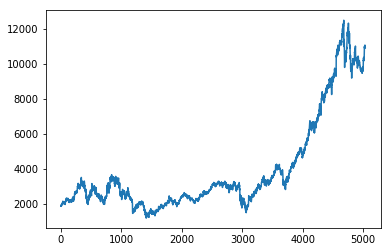

In [123]:
plt.plot(scaler.inverse_transform(dataset))


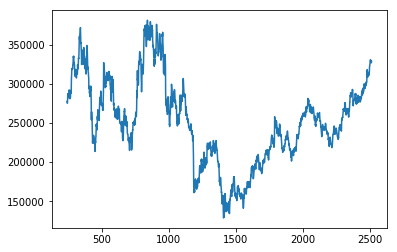

In [124]:
plt.plot(train_predict_plot)

In [122]:
?np.empty_like